<a href="https://colab.research.google.com/github/thiagoteles10/machine-learning-problema-de-classificacao-de-funcionarios/blob/main/ML_com_balanceamento_de_Classes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#                             **PROBLEMA A SER RESOLVIDO**



Em um cenário fictício, temos uma empresa que visa enviar candidatos ao exterior para um curso de qualificação que tem duração de 1 ano e começa no mês de janeiro, o qual acarreta custos significativos para a empresa. No entanto, em junho, a empresa tradicionalmente realiza cortes de funcionários devido a uma política interna. Portanto, é crucial identificar o maior número possível de funcionários que serão demitidos, a fim de evitar que esses colaboradores se inscrevam no curso de qualificação no exterior, apenas para serem desligados no meio do ano, o que resultaria em prejuízo para a empresa.

Por esse motivo, nossa prioridade será maximizar o recall, ou seja, identificar corretamente todos os funcionários que serão demitidos. Isso se justifica pelo fato de que classificar erroneamente um funcionário como não tendo sido demitido, quando na verdade ele foi, acarretaria em um custo muito maior para a empresa em comparação com a situação em que um funcionário é classificado como demitido erroneamente, mas que, na verdade não foi. Isso ocorre porque os candidatos erroneamente classificados como demitidos e que não foram desligados, em junho serão enviados imediatamente para o exterior para se juntar aos outros funcionários e iniciar o treinamento.

Dessa forma, ao priorizarmos o recall, estamos reduzindo o risco de enviar funcionários que serão demitidos em junho para o treinamento no exterior, minimizando o prejuízo financeiro e logístico da empresa.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# visualização
import seaborn as sns
import missingno

# machine learning
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

# métricas
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# importando o modelo random forest
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore') # filtro de warnings


In [2]:
#carregando o dataset
df = pd.read_csv('treino.csv')

In [3]:
# verificando as primeiras linhas do dataset
df.head()

,Unnamed: 0,Idade,Demissao,Viagem,SalarioHora,Departamento,DistanciaCasa,Educacao,CampoEducacional,NumeroEmpregados,...,AumentoSalarialPercentual,PerformanceRating,SatisfacaoRelacionamentos,AnosTrabalhados,TreinamentosUltimoAno,BalancoVidaTrabalho,AnorNaEmpresa,AnosNaPosicaoAtual,AnosUltimaPromocao,AnosComAtualGerente
0,0,41,1,Raramente,1102,Vendas,1,2,Ciencias Sociais,1,...,11,3,1,8,0,1,6,4,0,5
1,2,37,1,Raramente,1373,Pesquisa,2,2,Outros,1,...,15,3,2,7,3,3,0,0,0,0
2,14,28,1,Raramente,103,Pesquisa,24,3,Ciencias Sociais,1,...,14,3,2,6,4,3,4,2,0,3
3,21,36,1,Raramente,1218,Vendas,9,4,Ciencias Sociais,1,...,23,4,2,10,4,3,5,3,0,3
4,24,34,1,Raramente,699,Pesquisa,6,1,Medicina,1,...,11,3,3,8,2,3,4,2,1,3


In [4]:
#verificando quantidade de linhas e colunas
df.shape

(1420, 32)

In [5]:
# verificando os nomes das colunas
df.columns

Index(['Unnamed: 0', 'Idade', 'Demissao', 'Viagem', 'SalarioHora',
       'Departamento', 'DistanciaCasa', 'Educacao', 'CampoEducacional',
       'NumeroEmpregados', 'EmployeeNumber', 'Satisfacao', 'Genero',
       'SalarioHora.1', 'Envolvimento', 'NivelSenioridade', 'Cargo',
       'SatisfacaoAmbientes', 'StatusMatrimonial', 'Salario', 'SalarioMes',
       'NumeroEmpresasTrabalhou', 'AumentoSalarialPercentual',
       'PerformanceRating', 'SatisfacaoRelacionamentos', 'AnosTrabalhados',
       'TreinamentosUltimoAno', 'BalancoVidaTrabalho', 'AnorNaEmpresa',
       'AnosNaPosicaoAtual', 'AnosUltimaPromocao', 'AnosComAtualGerente'],
      dtype='object')

In [6]:
# verificando informações a respeito do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1420 entries, 0 to 1419
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Unnamed: 0                 1420 non-null   int64 
 1   Idade                      1420 non-null   int64 
 2   Demissao                   1420 non-null   int64 
 3   Viagem                     1420 non-null   object
 4   SalarioHora                1420 non-null   int64 
 5   Departamento               1420 non-null   object
 6   DistanciaCasa              1420 non-null   int64 
 7   Educacao                   1420 non-null   int64 
 8   CampoEducacional           1420 non-null   object
 9   NumeroEmpregados           1420 non-null   int64 
 10  EmployeeNumber             1420 non-null   int64 
 11  Satisfacao                 1420 non-null   int64 
 12  Genero                     1420 non-null   object
 13  SalarioHora.1              1420 non-null   int64 
 14  Envolvim

Vemos acima que o dataset não possui valores ausentes

In [7]:
# verificando se o dataset tem valores duplicados
df.duplicated().sum()

0

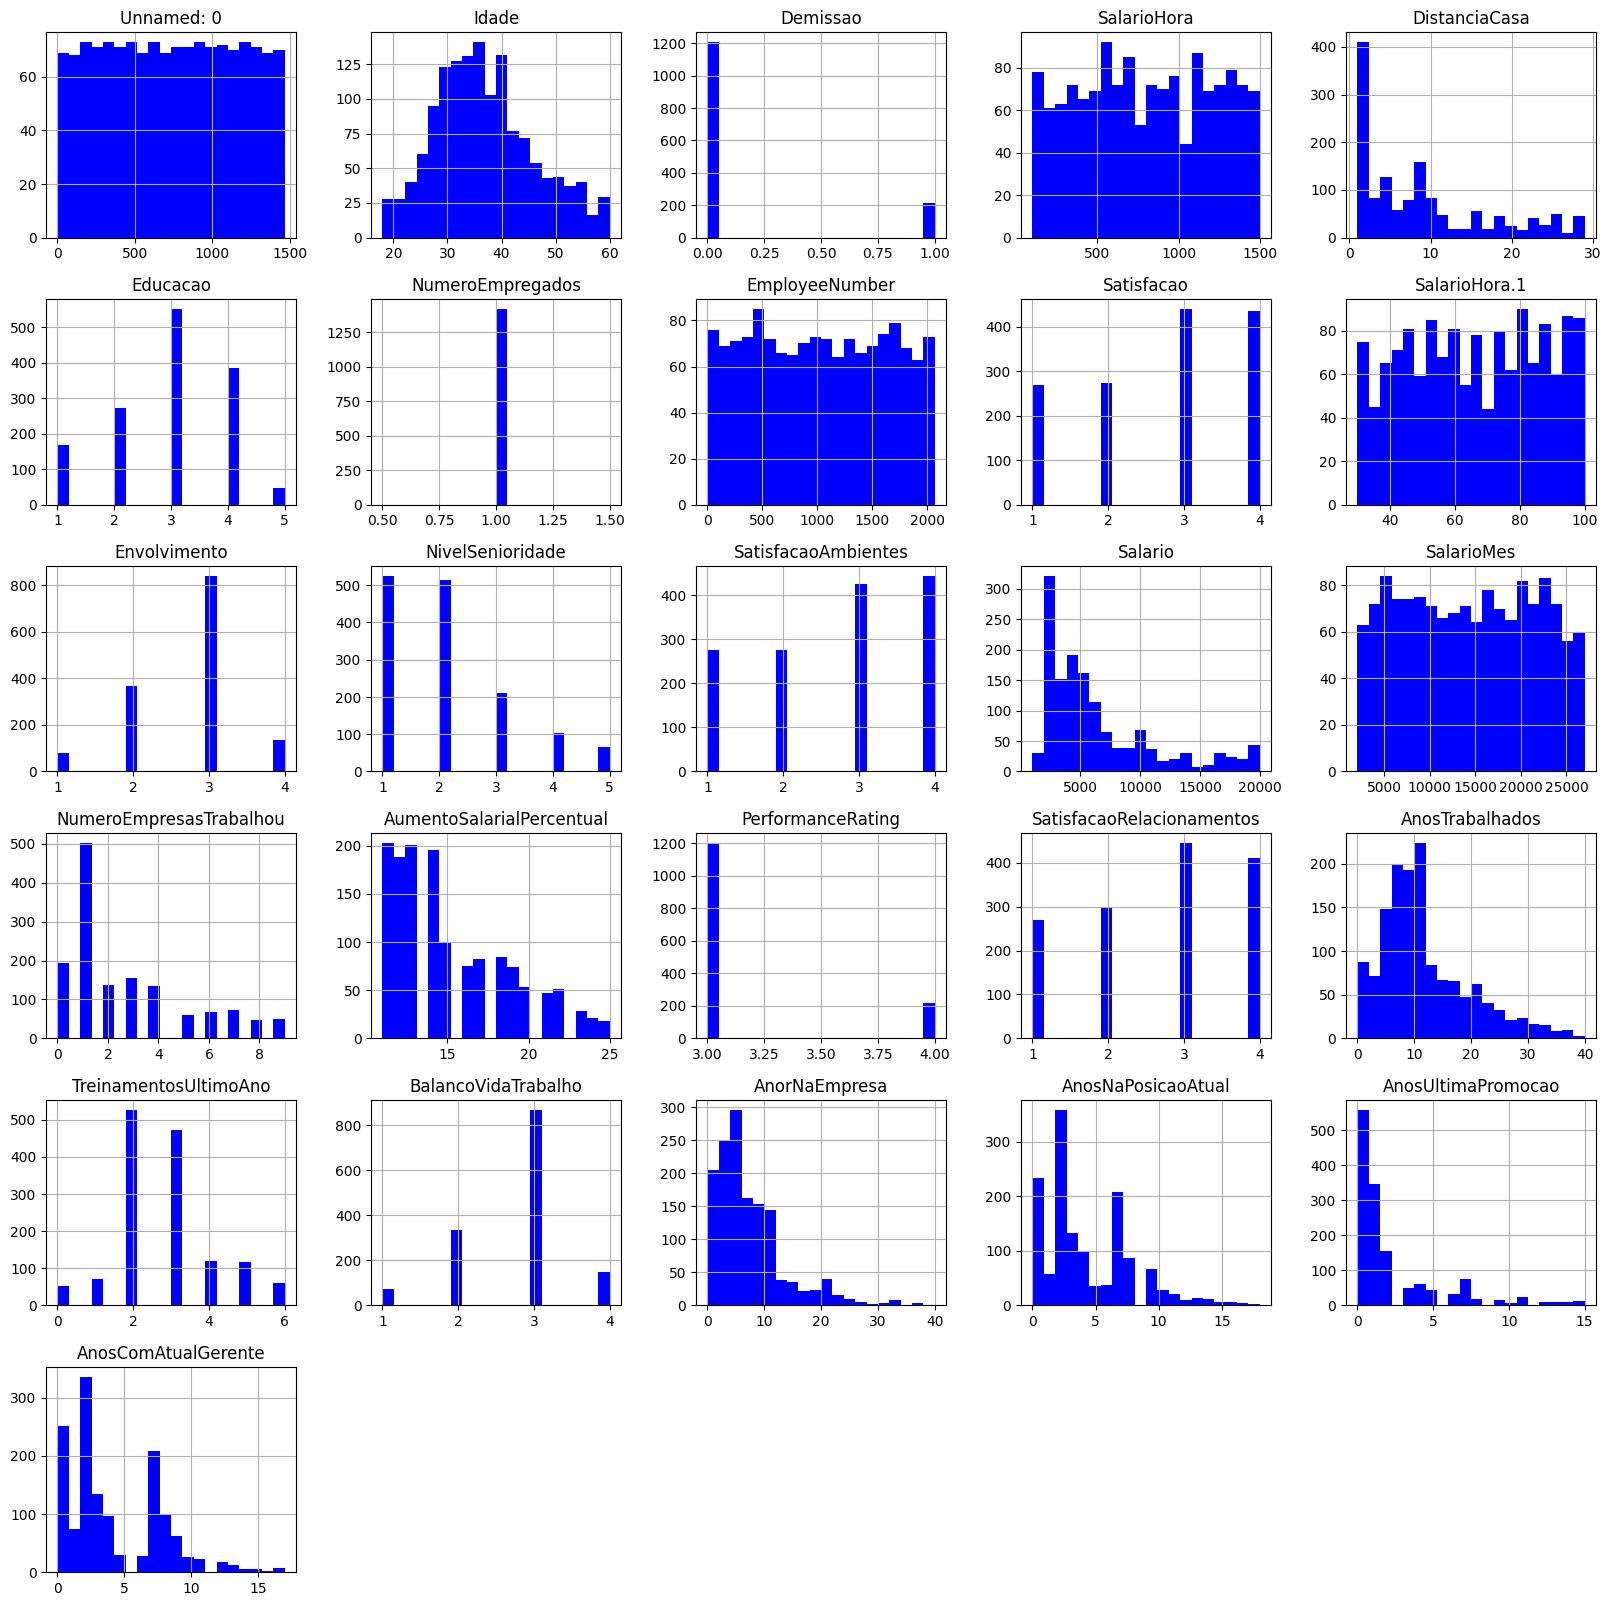

In [8]:
# verificando a distribuição das variáveis
df.hist(bins=20,figsize=(20,20),color='blue');

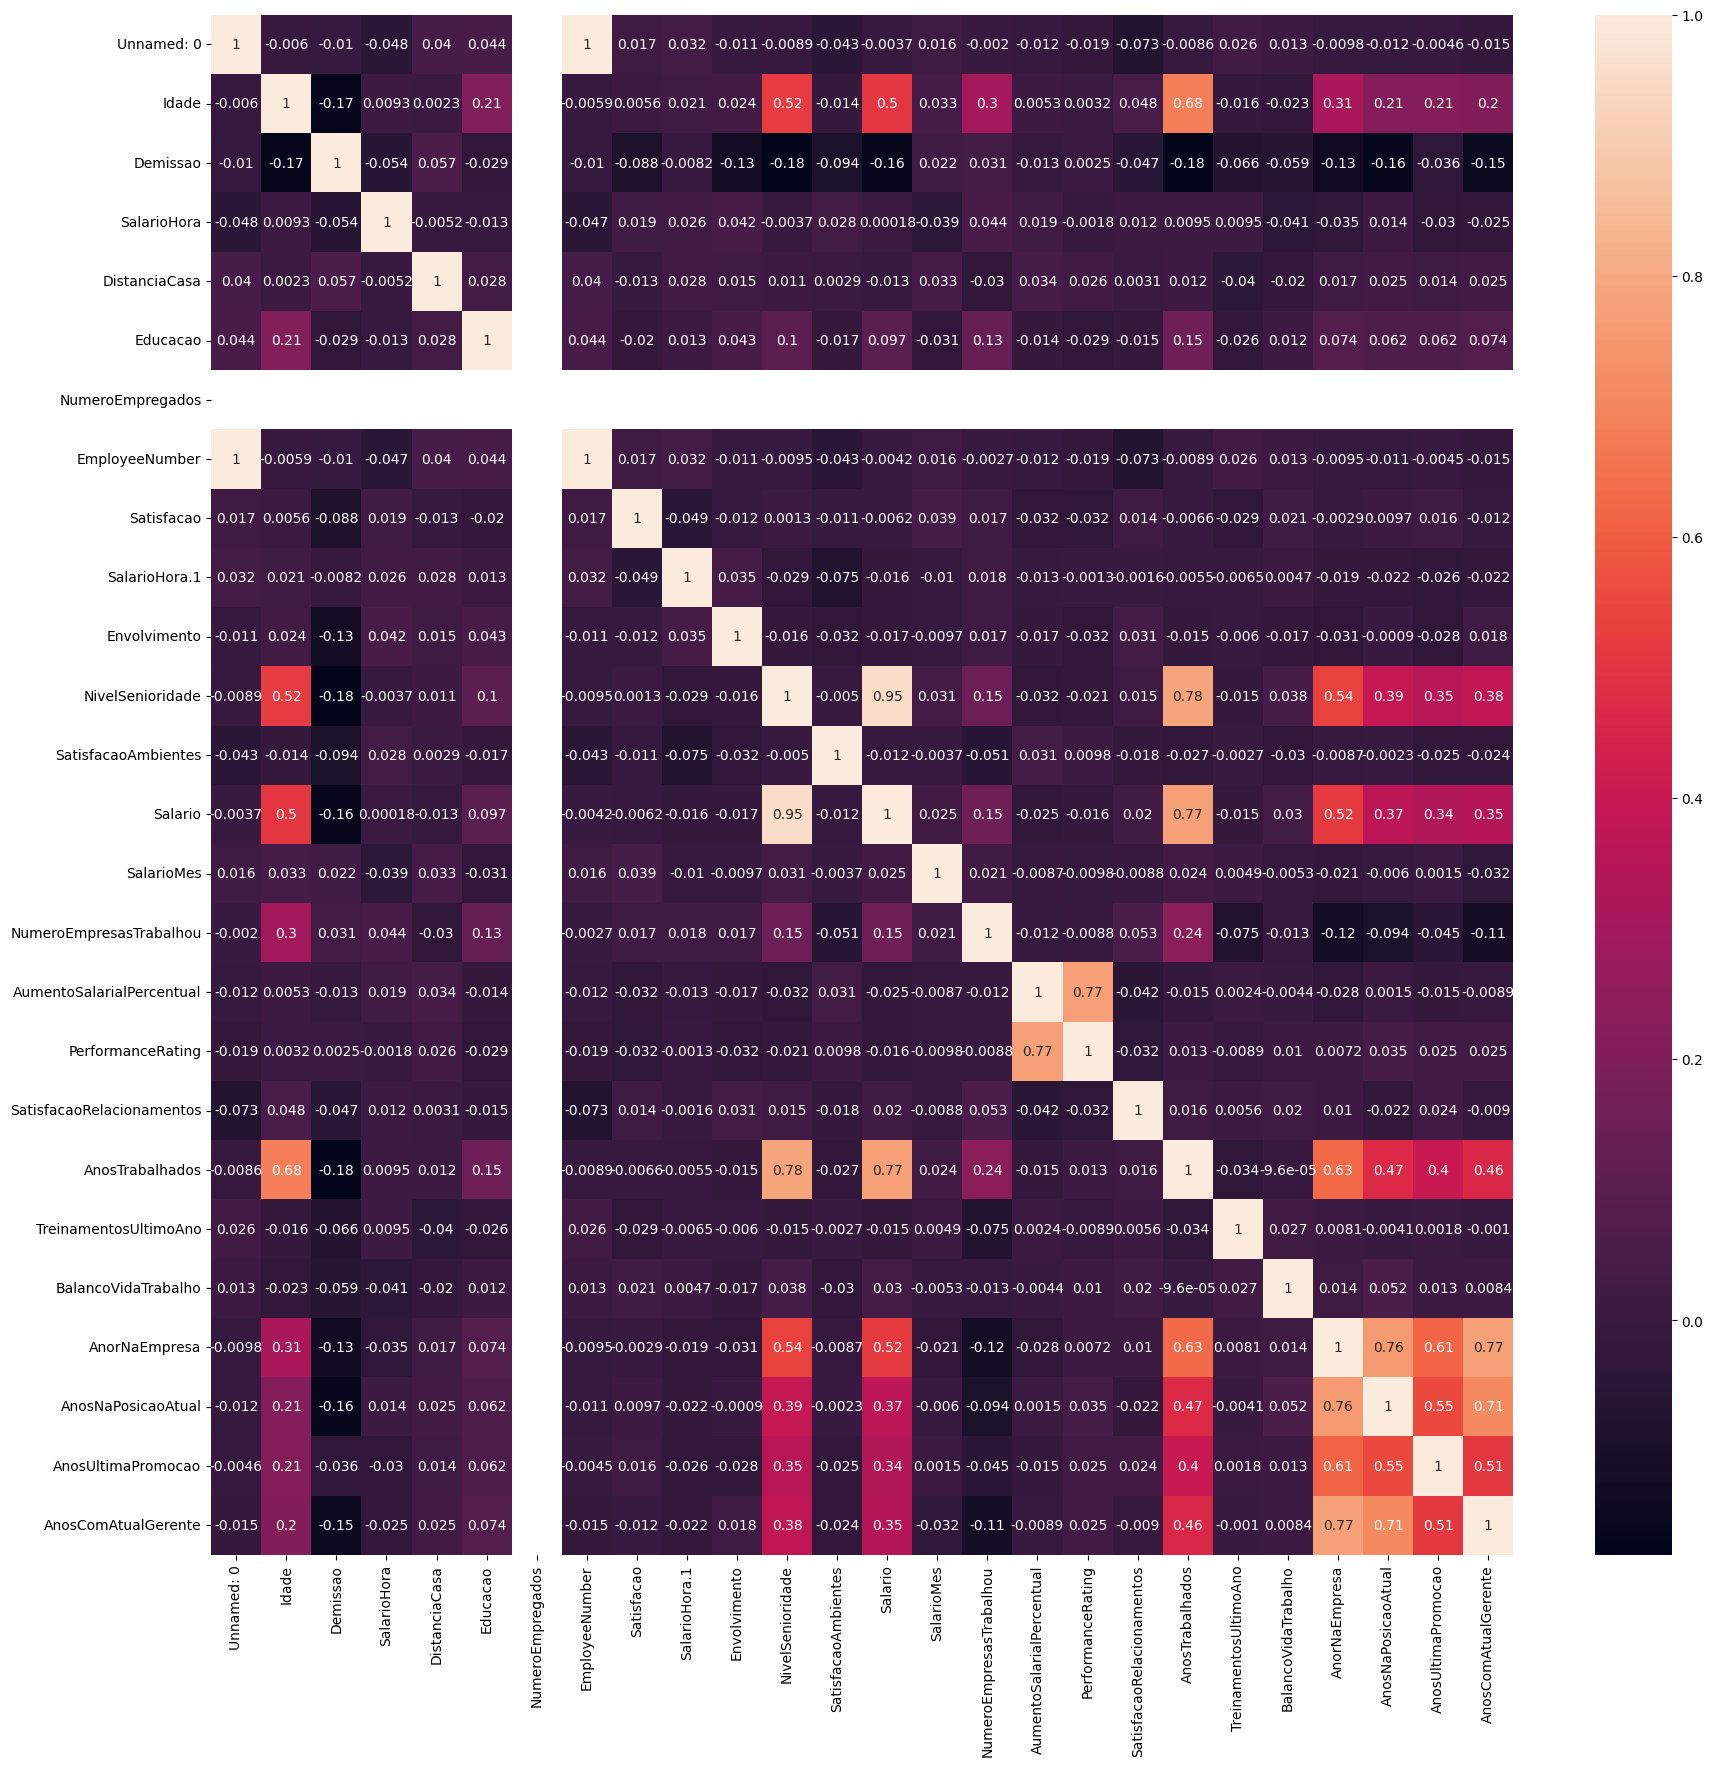

In [9]:
# verificando as correlações entre as variáveis
corr = df.corr()
f, ax = plt.subplots(figsize=(21,20));
sns.heatmap(corr, annot=True);

# Verificando a proporção do desbalanceamento da classe alvo

In [12]:
#aqui podemos ver o quanto a variável target é desbalanceada
class_counts = df['Demissao'].value_counts()

# Calculando a proporção das classes.
total_samples = len(df)
class_ratios = class_counts / total_samples

print(class_ratios)

0    0.850704
1    0.149296
Name: Demissao, dtype: float64


Vemos acima que há um grande desbalanceamento na classe alvo.

## TÉCNICA DE FEATURE IMPORTANCE COM USO DO XGBclassifier + CROSS VALIDATION + AJUSTE DE HIPERPARÂMETROS.

In [ ]:
# instalando a biblioteca category encoders
!pip install category_encoders

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from category_encoders.cat_boost import CatBoostEncoder
from category_encoders import TargetEncoder
from xgboost import XGBClassifier

# Carregar o conjunto de dados
df = pd.read_csv('treino.csv')

# separando as variáveis e retirando a variável 'Rank' pois a mesma define uma ordem de venda dos jogos e isso gera vazamento de dados.
X = df.drop(['Unnamed: 0', 'Demissao'], axis=1)
y = df['Demissao']

# Dividir o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

target_enc = TargetEncoder()

# Aplicar codificação apenas aos dados de treinamento
X_train_transformed = target_enc.fit_transform(X_train, y_train)
X_test_transformed = target_enc.transform(X_test)

# Calcula o scale_pos_weight com base na proporção de classes
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

# Treinar um modelo de xgbclassifer com o uso de hiperparâmetros
model = XGBClassifier(n_estimators=150,
    max_depth=2,
    min_child_weight =5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight = scale_pos_weight)

# Realizar validação cruzada
cv_scores = cross_val_score(model, X_train_transformed, y_train, cv=8, scoring='recall')

print("Scores de validação cruzada:", cv_scores)
print('\n')
print("Média do score de validação cruzada:", cv_scores.mean())

# Treinar o modelo com todos os dados de treinamento
model.fit(X_train_transformed, y_train)

# Obter a importância das variáveis
importances = model.feature_importances_

# Criar um DataFrame para exibir as importâncias das variáveis
importance_df = pd.DataFrame({'Feature': X_train_transformed.columns, 'Importance': importances})

# Ordenar as variáveis pela importância
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("Variáveis mais importantes:")
print(importance_df)

Scores de validação cruzada: [0.5        0.63636364 0.5        0.45454545 0.40909091 0.72727273
 0.61904762 0.66666667]


Média do score de validação cruzada: 0.5641233766233766
Variáveis mais importantes:
                      Feature  Importance
13           NivelSenioridade    0.154327
14                      Cargo    0.065061
16          StatusMatrimonial    0.050491
0                       Idade    0.048043
15        SatisfacaoAmbientes    0.038110
26              AnorNaEmpresa    0.037598
1                      Viagem    0.036581
17                    Salario    0.034422
29        AnosComAtualGerente    0.033372
12               Envolvimento    0.033017
9                  Satisfacao    0.032254
6            CampoEducacional    0.032026
28         AnosUltimaPromocao    0.031797
8              EmployeeNumber    0.030510
23            AnosTrabalhados    0.030208
20  AumentoSalarialPercentual    0.030193
27         AnosNaPosicaoAtual    0.029165
4               DistanciaCasa    0.027

# UTILIZANDO **"Select KBest"** PARA SELECIONAR AS MELHORES VARIÁVEIS PARA O MODELO

In [32]:
from sklearn.feature_selection import SelectKBest, chi2

# Carregar o conjunto de dados
df = pd.read_csv('treino.csv')

X = df.drop(['Unnamed: 0', 'Demissao'], axis=1)
y = df['Demissao']

# Dividir o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Selecione colunas com tipos de dados categóricos
categorical_features = df.select_dtypes(include=['object'])

target_enc = TargetEncoder()

# Aplicar codificação apenas aos dados de treinamento
X_train_transformed = target_enc.fit_transform(X_train, y_train)
X_test_transformed = target_enc.transform(X_test)

# Crie o objeto SelectKBest
selector = SelectKBest(chi2, k=30)

# Ajuste o seletor aos dados de treinamento
X_new = selector.fit_transform(X_train_transformed, y_train)

# Obtenha um array booleano que indica as variáveis selecionadas
selected_features_mask = selector.get_support()

# Obtenha os nomes das colunas originais
all_feature_names = X_train_transformed.columns

# Selecione apenas os nomes das colunas correspondentes às variáveis selecionadas
selected_feature_names = [name for name, selected in zip(all_feature_names, selected_features_mask) if selected]

print("Nomes das variáveis selecionadas:")
print(selected_feature_names)


Nomes das variáveis selecionadas:
['Idade', 'Viagem', 'SalarioHora', 'Departamento', 'DistanciaCasa', 'Educacao', 'CampoEducacional', 'NumeroEmpregados', 'EmployeeNumber', 'Satisfacao', 'Genero', 'SalarioHora.1', 'Envolvimento', 'NivelSenioridade', 'Cargo', 'SatisfacaoAmbientes', 'StatusMatrimonial', 'Salario', 'SalarioMes', 'NumeroEmpresasTrabalhou', 'AumentoSalarialPercentual', 'PerformanceRating', 'SatisfacaoRelacionamentos', 'AnosTrabalhados', 'TreinamentosUltimoAno', 'BalancoVidaTrabalho', 'AnorNaEmpresa', 'AnosNaPosicaoAtual', 'AnosUltimaPromocao', 'AnosComAtualGerente']


## USANDO O **"RFE"** COM **"RandomForestClassifier"** PARA SELECIONAR AS MELHORES VARIÁVEIS PARA O MODELO.

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from category_encoders import TargetEncoder
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Carregar o conjunto de dados
df = pd.read_csv('treino.csv')

X = df.drop(['Unnamed: 0', 'Demissao'], axis=1)
y = df['Demissao']

# Dividir o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Selecione colunas com tipos de dados categóricos
categorical_features = df.select_dtypes(include=['object'])

target_enc = TargetEncoder()

# Aplicar codificação apenas aos dados de treinamento
X_train_transformed = target_enc.fit_transform(X_train, y_train)
X_test_transformed = target_enc.transform(X_test)

# Crie o objeto RandomForestClassifier para RFE
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Crie o objeto RFE com RandomForestClassifier
rfe_selector = RFE(estimator=rf_classifier, n_features_to_select=30)

# Ajuste o seletor RFE aos dados de treinamento
X_new = rfe_selector.fit_transform(X_train_transformed, y_train)

# Obtenha as importâncias das características
feature_importances = rfe_selector.estimator_.feature_importances_

# Obtenha os nomes das colunas originais
all_feature_names = X_train_transformed.columns

# Crie um DataFrame para exibir as importâncias das características
feature_importance_df = pd.DataFrame({'Feature': all_feature_names, 'Importance': feature_importances})

# Ordene o DataFrame pela importância das características
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Exiba as importâncias das características
for index, row in feature_importance_df.iterrows():
    print(f"Feature: {row['Feature']}, Importance: {row['Importance']}")


Feature: Salario, Importance: 0.07203742324751071
Feature: Idade, Importance: 0.0713904713386426
Feature: SalarioMes, Importance: 0.05590407230811275
Feature: SalarioHora, Importance: 0.05305537878280929
Feature: EmployeeNumber, Importance: 0.05266730159526152
Feature: AnosTrabalhados, Importance: 0.05168717785981784
Feature: DistanciaCasa, Importance: 0.051498112245424214
Feature: SalarioHora.1, Importance: 0.048582505228846114
Feature: AnorNaEmpresa, Importance: 0.041801608898033596
Feature: Cargo, Importance: 0.04081788353242411
Feature: AumentoSalarialPercentual, Importance: 0.037705361689335075
Feature: CampoEducacional, Importance: 0.0324486126304964
Feature: NumeroEmpresasTrabalhou, Importance: 0.030430386734953706
Feature: AnosComAtualGerente, Importance: 0.029955804436558618
Feature: StatusMatrimonial, Importance: 0.029746159285214582
Feature: Satisfacao, Importance: 0.029109485908426075
Feature: AnosUltimaPromocao, Importance: 0.02871970364762078
Feature: SatisfacaoAmbientes,

Acima foram utilizadas várias técnicas de feature selection na qual buscamos selecionar as melhores variáveis para o modelo. Para cada técnica e parametros utilizados, temos diferentes features selecionadas.Como não há uma receita pronta, o segredo é ir testando o modelo com as features dos modelos e depois selecionar as que melhor perfomam para nosso modelo específico.

In [ ]:
#instalando a biblioteca
!pip install feature_engine

In [ ]:
#instalando o modelo
!pip install lightgbm

## UTILIZANDO XGBCLASSIFIER COM AJUSTE DE HIPERPARÂMETROS E **"SEM"** AJUSTE DO SCALE_POS_WEIGHT

In [15]:
# carregando as bibliotecas
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import StandardScaler
from category_encoders import TargetEncoder
from sklearn.preprocessing import OneHotEncoder
from category_encoders.cat_boost import CatBoostEncoder
from feature_engine.selection import DropConstantFeatures, DropCorrelatedFeatures, SmartCorrelatedSelection
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score
from xgboost import XGBClassifier
import lightgbm as lgb

In [16]:
# Carregar o conjunto de dados
df = pd.read_csv('treino.csv')

# separando as variáveis e retirando a variável 'Rank' pois a mesma define uma ordem de venda dos jogos e isso gera vazamento de dados.
X = df.drop(['Unnamed: 0', 'Demissao'], axis=1)
y = df['Demissao']

# Dividir o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

numerical_features = ['Idade', 'SalarioHora', 'DistanciaCasa',
       'Educacao', 'NumeroEmpregados', 'EmployeeNumber', 'Satisfacao',
       'SalarioHora.1', 'Envolvimento', 'NivelSenioridade',
       'SatisfacaoAmbientes', 'Salario', 'SalarioMes',
       'NumeroEmpresasTrabalhou', 'AumentoSalarialPercentual',
       'PerformanceRating', 'SatisfacaoRelacionamentos', 'AnosTrabalhados',
       'TreinamentosUltimoAno', 'BalancoVidaTrabalho', 'AnorNaEmpresa',
       'AnosNaPosicaoAtual', 'AnosUltimaPromocao', 'AnosComAtualGerente']

categorical_features = ['Viagem',
 'Departamento',
 'CampoEducacional',
 'Genero',
 'Cargo',
 'StatusMatrimonial']

# cria tratamentos específicos para as variáveis categóricas e numéricas
numeric_transform = Pipeline(steps=[('scaler',StandardScaler())])
categorical_transform = Pipeline(steps=[('targetencoder',TargetEncoder())])

# combina os pré_processamentos dos diferentes tipos de features
preprocessor = ColumnTransformer(
    transformers=[
        ('num',numeric_transform,numerical_features),
        ('cat',categorical_transform,categorical_features)
        ])


# carregando o o modelo e ajustando os hiperparâmetros
xgb_class = XGBClassifier(n_estimators=150,
    max_depth=2,
    min_child_weight =5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    )

# roda o pré-processamento, seleção de features e o modelo
pipe = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('drop_constant_features', DropConstantFeatures()),
    ('drop_correlated_features', DropCorrelatedFeatures()),
    ('smart_correlated_features', SmartCorrelatedSelection()),
    ('XGBclassifier',xgb_class)
])

# treinando o modelo
pipe.fit(X_train,y_train)

# 7. Fazer previsões no conjunto de teste
y_pred = pipe.predict(X_test)


print('\n')

# Calcular e imprimir métricas de avaliação
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))





Accuracy: 0.8943661971830986
Precision: 0.875
Recall: 0.3333333333333333
F1 Score: 0.48275862068965514


Vemos acima que temos uma acurácia de 87% o que a primeira vista pode parecer muito bom, mas na verdade quando estamos lidando com classses desbalancedas a acurácia é uma métrica que pode nos enganar pois o modelo tende a favorecer a classe dominante. Vemos também que o precision está com um valor muito bom, mas o recall que é a métrica que nos interessa, está bem abaixo do esperado e isso se deve ao fato do desbalanceamento das classes, sendo assim precisamos usar algumas medidas que visem minimizar esse desbalanceamento.

In [ ]:
!pip install imbalanced-learn


## USANDO O XGBCLASSIFIER COM AJUSTE DE HIPERPARÂMETROS E USO DO SCALE_POS_WEIGHT

In [18]:
# Carregar o conjunto de dados
df = pd.read_csv('treino.csv')

# separando as variáveis e retirando a variável 'Rank' pois a mesma define uma ordem de venda dos jogos e isso gera vazamento de dados.
X = df.drop(['Unnamed: 0', 'Demissao'], axis=1)
y = df['Demissao']

# Dividir o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

numerical_features = ['Idade', 'SalarioHora', 'DistanciaCasa',
       'Educacao', 'NumeroEmpregados', 'EmployeeNumber', 'Satisfacao',
       'SalarioHora.1', 'Envolvimento', 'NivelSenioridade',
       'SatisfacaoAmbientes', 'Salario', 'SalarioMes',
       'NumeroEmpresasTrabalhou', 'AumentoSalarialPercentual',
        'SatisfacaoRelacionamentos', 'AnosTrabalhados',
       'TreinamentosUltimoAno', 'BalancoVidaTrabalho', 'AnorNaEmpresa',
       'AnosNaPosicaoAtual', 'AnosUltimaPromocao', 'AnosComAtualGerente']

categorical_features = ['Viagem',
 'Departamento',
 'CampoEducacional',
 'Cargo',
 'StatusMatrimonial']

# cria tratamentos específicos para as variáveis categóricas e numéricas
numeric_transform = Pipeline(steps=[('scaler',StandardScaler())])
categorical_transform = Pipeline(steps=[('targetencoder',TargetEncoder())])

# combina os pré_processamentos dos diferentes tipos de features
preprocessor = ColumnTransformer(
    transformers=[
        ('num',numeric_transform,numerical_features),
        ('cat',categorical_transform,categorical_features)
        ])

# Calcula o scale_pos_weight com base na proporção de classes
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

# carregando o o modelo e ajustando os hiperparâmetros
xgb_class = XGBClassifier(n_estimators=150,
    max_depth=2,
    min_child_weight =5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight = scale_pos_weight
    )

# roda o pré-processamento, seleção de features e o modelo
pipe = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('drop_constant_features', DropConstantFeatures()),
    ('drop_correlated_features', DropCorrelatedFeatures()),
    ('smart_correlated_features', SmartCorrelatedSelection()),
    ('XGBclassifier',xgb_class)
])

# treinando o modelo
pipe.fit(X_train,y_train)

# 7. Fazer previsões no conjunto de teste
y_pred = pipe.predict(X_test)


print('\n')

# Calcular e imprimir métricas de avaliação
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))






Accuracy: 0.8169014084507042
Precision: 0.41379310344827586
Recall: 0.5714285714285714
F1 Score: 0.48000000000000004


Vemos que com o uso do scale_pos_weight, tivemos uma melhora no equilíbrio das métricas, principalmente em relação ao recall que é nossa métrica alvo.Por esse motivo, class_pos_weight se mostra uma boa alternativa para lidar com classes desbalancedas.

## COMBINANDO SUB-AMOSTRAGEM COM SUPER-AMOSTRAGEM (SMOTEENN) + SCALE_POS_WEIGHT

In [19]:
from imblearn.combine import SMOTEENN
from collections import Counter

# Carregar o conjunto de dados
df = pd.read_csv('treino.csv')

# separando as variáveis e retirando a variável 'Rank' pois a mesma define uma ordem de venda dos jogos e isso gera vazamento de dados.
X = df.drop(['Unnamed: 0', 'Demissao'], axis=1)
y = df['Demissao']

# Dividir o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

encoder = TargetEncoder()

X_train_encoded = encoder.fit_transform(X_train, y_train)
X_test_encoded = encoder.transform(X_test)

#exibindo a distribuição da classe
print('antes: ', Counter(y_train))

#definindo a estratégia de super-amostragem
sample = SMOTEENN(sampling_strategy=1)

#aplicando a transformação de super-amostragem
X_sample,y_sample = sample.fit_resample(X_train_encoded,y_train)

#exibindo a distribuição de classe
print('depois: ', Counter(y_sample))
print('*'*100)

#carregando o modelo
model = XGBClassifier(n_estimators=150,
    max_depth=2,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight = 14
                      )

#treinando o modelo
model.fit(X_sample,y_sample)

y_pred = model.predict(X_test_encoded)

# métricas de avaliação das predições
print('Acurácia: %.2f' % accuracy_score(y_test,y_pred))
print('Precisão: %.2f' % precision_score(y_test,y_pred))
print('Recall: %.2f' % recall_score(y_test,y_pred))
print('F1-score: %.2f' % f1_score(y_test,y_pred))

antes:  Counter({0: 1087, 1: 191})
depois:  Counter({1: 855, 0: 556})
****************************************************************************************************
Acurácia: 0.57
Precisão: 0.21
Recall: 0.71
F1-score: 0.33


Acima foi utilizada uma técnica de balanceamento de dados chamada de SMOTEENN, Essa técnica combina duas estratégias para equilibrar as classes: SMOTE (Synthetic Minority Over-sampling Technique) e Edited Nearest Neighbors (ENN).
Vemos que o modelo se saiu muito bem na métrica que estamos buscando que é o recall, mesmo se saindo mal no precision o que vai gerar mais falsos positivos, indicando que muitos funcionários serão demitidos quando na verdade não serão. Como nosso objetivo é identificar o maior número de funcionários que realmente vão ser demitidos, o modelo acima atende bem aos requisitos,pois um alto recall gera uma menor quantidade de falsos negativos. O falso negativo é o quando o modelo prevê que um funcionário não será demitido quando na realidade esse funcionário será demitido o que acarretaria no envio do funcionário para realização do curso e quando viesse o corte da empresa esse funcionário seria desligado do curso o que geraria prejuízo para empresa. Por isso que a depender do que estamos buscando resolver no problema, o** TRADE-OFF** é uma questão a ser discutida com a empresa, pois a mesma teria que avaliar o custo de não enviar o funcionário para o treinamento que a primeira vista seria o atraso na formação do funcionário versus o custo de enviar o funcionário para o curso e após 6 meses o funcionário ser desligado acarretando assim despesas como passagens,hospedagem,o valor do curso em si, o afastamento do funcionário da empresa e etc. Todos esses fatores tem que ser discutidos com a empresa.

## USANDO LIGHTGBMCLASSIFIER + VALIDAÇÃO CRUZADA ESTRATIFICADA

In [20]:
!pip install lightgbm

In [35]:
import pandas as pd
import numpy as np
from imblearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_validate, train_test_split
from lightgbm import LGBMClassifier
import lightgbm as lgb
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours
from category_encoders import CatBoostEncoder
from sklearn.model_selection import RepeatedStratifiedKFold

# Carregar o conjunto de dados
df = pd.read_csv('treino.csv')

X = df.drop(['Unnamed: 0', 'Demissao'], axis=1)
y = df['Demissao']

# Dividir o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Transformando as variáveis categóricas em numéricas
encoder = TargetEncoder()

X_train_encoded = encoder.fit_transform(X_train, y_train)
X_test_encoded = encoder.transform(X_test)

# Define model (Aqui você usa o LGBMClassifier em vez do XGBClassifier)
model = lgb.LGBMClassifier(objective='binary',
                         boosting_type= "gbdt",        # Tipo de boosting (Gradient Boosting Decision Tree)
                          num_leaves= 10,               # Número máximo de folhas em cada árvore
                          max_depth = 2,               # Profundidade máxima das árvores
                          learning_rate= 0.1,         # Taxa de aprendizado
                          n_estimators= 150,           # Número de árvores no ensemble
                          subsample= 0.8,              # Fração de amostras a serem usadas para treinar cada árvore
                          colsample_bytree= 0.8,       # Fração de recursos (colunas) amostrados ao criar cada árvore
                          metric= "binary_logloss",    # Métrica de avaliação
                          random_state= 42 ,
                           is_unbalance= True,      # informando que temos um desbalanceamento no modelo

                       )

# Define SMOTE-ENN
resample = SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='all'))

# Define pipeline
pipeline = Pipeline(steps=[('r', resample), ('drop_constant_features', DropConstantFeatures()),
                           ('drop_correlated_features', DropCorrelatedFeatures()),
                           ('smart_correlated_features', SmartCorrelatedSelection()), ('m', model)])

# Define o procedimento de avaliação (aqui usamos a Validação Cruzada Estratificada com Repetições).
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)

# Avaliando modelo
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
scores = cross_validate(pipeline, X_test_encoded, y_test, scoring=scoring, cv=cv, n_jobs=-1)

# Métricas de avaliação
print('Accuracy: %.4f' % np.mean(scores['test_accuracy']))
print('Precision: %.4f' % np.mean(scores['test_precision_macro']))
print('Recall: %.4f' % np.mean(scores['test_recall_macro']))
print('F1-score: %.4f' % np.mean(scores['test_f1_macro']))


Accuracy: 0.8195
Precision: 0.6422
Recall: 0.6553
F1-score: 0.6347


Se nosso problema exigisse um **TRADE-OFF** onde as métricas deveriam ter um equlíbrio maior entre elas, esse modelo se mostraria mais eficaz em comparação aos demais modelos.

## USANDO O LIGHTGBMCLASSIFIER + CLASS_WEIGHT

In [ ]:
!pip install catboost

In [23]:
# carregando as bibliotecas
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from category_encoders import TargetEncoder
from category_encoders.cat_boost import CatBoostEncoder
from feature_engine.selection import DropConstantFeatures, DropCorrelatedFeatures, SmartCorrelatedSelection
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier

# Carregar o conjunto de dados
df = pd.read_csv('treino.csv')

X = df.drop(['Unnamed: 0', 'Demissao'], axis=1)
y = df['Demissao']

# Dividir o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

X_train.shape,X_test.shape

((1136, 30), (284, 30))

In [24]:
#identificando as variáveis categóricas e numéricas
categorical_fetaures = X_train.select_dtypes(include=['object']).columns.tolist()
numerical_features = X_train.select_dtypes(exclude=['object']).columns.tolist()

categorical_features,numerical_features


(['Viagem', 'Departamento', 'CampoEducacional', 'Cargo', 'StatusMatrimonial'],
 ['Idade',
  'SalarioHora',
  'DistanciaCasa',
  'Educacao',
  'NumeroEmpregados',
  'EmployeeNumber',
  'Satisfacao',
  'SalarioHora.1',
  'Envolvimento',
  'NivelSenioridade',
  'SatisfacaoAmbientes',
  'Salario',
  'SalarioMes',
  'NumeroEmpresasTrabalhou',
  'AumentoSalarialPercentual',
  'PerformanceRating',
  'SatisfacaoRelacionamentos',
  'AnosTrabalhados',
  'TreinamentosUltimoAno',
  'BalancoVidaTrabalho',
  'AnorNaEmpresa',
  'AnosNaPosicaoAtual',
  'AnosUltimaPromocao',
  'AnosComAtualGerente'])

In [25]:
#criando um columtransformer e aplicando targetencoder e standardscaler
preprocessor = ColumnTransformer(
               transformers=[
    ('target',TargetEncoder(),categorical_features),
    ('scaler',StandardScaler(),numerical_features)
])

In [46]:
#atribuindo pesos para tentar diminuir o impacto do desbalanceamento
class_weights = {0: 1, 1: 14}

In [47]:
#construindo um pipeline
pipeline = Pipeline([
    ('preprocessor',preprocessor),
    ('drop_constant_features', DropConstantFeatures()),
    ('drop_correlated_features', DropCorrelatedFeatures()),
    ('smart_correlated_features', SmartCorrelatedSelection()),

    #ajustando os hiperparâmetros do modelo

    ('lightgbm', lgb.LGBMClassifier(objective='binary',
                         boosting_type= "gbdt", # Tipo de boosting (Gradient Boosting Decision Tree)
                          num_leaves= 30,               # Número máximo de folhas em cada árvore
                          max_depth = 2,               # Profundidade máxima das árvores
                          learning_rate= 0.1,         # Taxa de aprendizado
                          n_estimators= 150,           # Número de árvores no ensemble
                          subsample= 0.8,              # Fração de amostras a serem usadas para treinar cada árvore
                          colsample_bytree= 0.8,       # Fração de recursos (colunas) amostrados ao criar cada árvore
                          class_weight=class_weights,  # dimminuindo o impacto do desbalanceamento
                          #auto_class_weights= True,
                          random_state= 42))
])

#treinando o pipeline
pipeline.fit(X_train,y_train)

[LightGBM] [Info] Number of positive: 174, number of negative: 962
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000284 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1138
[LightGBM] [Info] Number of data points in the train set: 1136, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.716892 -> initscore=0.929098
[LightGBM] [Info] Start training from score 0.929098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('target', TargetEncoder(),
                                                  ['Viagem', 'Departamento',
                                                   'CampoEducacional', 'Cargo',
                                                   'StatusMatrimonial']),
                                                 ('scaler', StandardScaler(),
                                                  ['Idade', 'SalarioHora',
                                                   'DistanciaCasa', 'Educacao',
                                                   'NumeroEmpregados',
                                                   'EmployeeNumber',
                                                   'Satisfacao',
                                                   'SalarioHora.1',
                                                   'Envolvimento',
                                                   'NivelSenioridade',
                                                   'Satisfaca...
                                                   'AnosComAtualGerente'])])),
                ('drop_constant_features', DropConstantFeatures()),
                ('drop_correlated_features', DropCorrelatedFeatures()),
                ('smart_correlated_features', SmartCorrelatedSelection()),
                ('lightgbm',
                 LGBMClassifier(class_weight={0: 1, 1: 14},
                                colsample_bytree=0.8, max_depth=2,
                                n_estimators=150, num_leaves=30,
                                objective='binary', random_state=42,
                                subsample=0.8))])

In [48]:
# 7. Fazer previsões no conjunto de teste
y_pred = pipeline.predict(X_test)

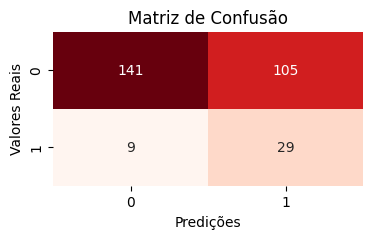

In [49]:
#CRIANDO A MATRIX DE CONFUSÃO
confusion = confusion_matrix(y_test, y_pred)

# Crie o heatmap da matriz de confusão
plt.figure(figsize=(4, 2))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Reds", cbar=False)
plt.xlabel("Predições")
plt.ylabel("Valores Reais")
plt.title("Matriz de Confusão")
plt.show()


In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.57      0.71       246
           1       0.22      0.76      0.34        38

    accuracy                           0.60       284
   macro avg       0.58      0.67      0.52       284
weighted avg       0.84      0.60      0.66       284



In [51]:
print('\n')

# Calcular e imprimir métricas de avaliação
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))



Accuracy: 0.5985915492957746
Precision: 0.21641791044776118
Recall: 0.7631578947368421
F1 Score: 0.3372093023255814


No código acima utilizamos a opção de ajustar manualmente o scale_pos_weight para controlar o equilíbrio das classes, como no nosso caso a métrica que estamos buscando é o recall, o resultado se mostrou bastante interessante, dentre todos os modelos testados, esse último modelo se mostrou o mais efeciente para o trade-off que estamos buscando.